# ON26 PYTHON - Projeto Livre
## EcoLens: revelando disparidades ambientais
### Aluna: Nargylla Fernanda Cloviel Lima


#### Análise exploratória

##### Importando as bibliotecas necessárias

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

definição dos datasets

In [28]:
df_desastres_e_sociedade = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Desastres_e_sociedade.csv")
df_impactos_africa = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Impactos_africa.csv")
df_mortalidade_agua = pd.read_csv("C:\\Users\\nargy\\Desktop\\Projeto final\\Mortalidade_agua_insalubre.csv") 

#### A análise exploratória será utilizada para responder os seguintes questionamentos:
- Quais países da África subsariana mais sofrem com problemas ambientais?
- Quais os problemas mais comuns nesses países?
- Qual a relação entre a % de terra arável com o estresse hídrico do país?
- Qual a relação entre a % de mulheres na agricultura e a % de terra disponível?
- Qual a relação entre o estresse hídrico e a captação de água potável para o consumo?
- As maiores morrem mais por consumo de água imprópria e falta de higiene comparadas aos homens?

In [29]:
#Quais países da África subsariana mais sofrem com problemas ambientais?
df_desastres_e_sociedade

,Unnamed: 0,Unnamed: 0_x,Year_x,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,...,Unit,Symbol,Unnamed: 0_y,COUB,Place of birth,Education level,Age,Sex,Country of residence,Value_y
0,0,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,510,ETH,Foreign-born,ISCED 3/4,25-64 years,Women,OECD - Total,22763
1,1,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,513,ETH,All places of birth,ISCED 3/4,25-64 years,Women,OECD - Total,22763
2,2,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,516,ETH,Foreign-born,Unknown education,25-64 years,Women,OECD - Total,1210
3,3,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,519,ETH,All places of birth,Unknown education,25-64 years,Women,OECD - Total,1210
4,4,13285,2016,101,Natural,Hydrological,Flood,Ethiopia,ETH,Eastern Africa,...,%,E,522,ETH,Foreign-born,ISCED 0/1/2,25-64 years,Women,OECD - Total,12976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,9093,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5679,ZMB,All places of birth,ISCED 0/1/2,All ages,Women,OECD - Total,2942
9094,9094,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5682,ZMB,Foreign-born,ISCED 5/6,All ages,Women,OECD - Total,8132
9095,9095,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5685,ZMB,All places of birth,ISCED 5/6,All ages,Women,OECD - Total,8132
9096,9096,16070,2020,110,Natural,Hydrological,Flood,Zambia,ZMB,Eastern Africa,...,%,E,5688,ZMB,Foreign-born,All levels of education,All ages,Women,OECD - Total,18191


In [30]:
df_desastres_e_sociedade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9098 non-null   int64  
 1   Unnamed: 0_x          9098 non-null   int64  
 2   Year_x                9098 non-null   int64  
 3   Seq                   9098 non-null   int64  
 4   Disaster Group        9098 non-null   object 
 5   Disaster Subgroup     9098 non-null   object 
 6   Disaster Type         9098 non-null   object 
 7   Country               9098 non-null   object 
 8   ISO                   9098 non-null   object 
 9   Region                9098 non-null   object 
 10  Continent             9098 non-null   object 
 11  End Year              9098 non-null   int64  
 12  Total Deaths          7032 non-null   float64
 13  VariableGroup         9098 non-null   object 
 14  Subgroup              9098 non-null   object 
 15  Variable             

Verificando os tipos mais comuns de desastres ambientais

In [31]:
df_desastres_e_sociedade.value_counts("Disaster Subgroup")

Disaster Subgroup
Hydrological      5310
Biological        1558
Meteorological    1278
Climatological     872
Geophysical         80
Name: count, dtype: int64

In [32]:
#Verificando a quantidade de desastres por países
df_desastres_paises = df_desastres_e_sociedade.value_counts("Country")
df_desastres_paises

Country
Uganda                      1000
Nigeria                     1000
Kenya                        800
Mozambique                   760
South Africa                 720
Rwanda                       680
Madagascar                   600
Angola                       600
Ethiopia                     600
Somalia                      560
Ghana                        400
Central African Republic     280
Zimbabwe                     280
Burkina Faso                 266
Zambia                       240
Senegal                      160
Lesotho                      152
Name: count, dtype: int64

Os desastres correspondem ao período de 2016 - 2021

In [33]:
#Selecionando os 10 países com mais desastres
df_des_paises_prin = df_desastres_paises.head(10)
df_des_paises_prin

Country
Uganda          1000
Nigeria         1000
Kenya            800
Mozambique       760
South Africa     720
Rwanda           680
Madagascar       600
Angola           600
Ethiopia         600
Somalia          560
Name: count, dtype: int64

In [34]:
# Dos 10 selecionados, vendo os tipos de desastres que ocorreram
paises_top10 = ["Uganda", "Nigeria", "Kenya", "Mozambique", "South Africa", "Rwanda", "Madagascar", "Angola", "Ethiopia", "Somalia"]
df_top10 = df_desastres_e_sociedade[df_desastres_e_sociedade["Country"].isin(paises_top10)]
resultado = df_top10.groupby(["Country", "Disaster Subgroup"]).size().reset_index(name='contagem') #ajustando o index para a formação de um novo dataframe
print(resultado)

         Country Disaster Subgroup  contagem
0         Angola        Biological        40
1         Angola    Climatological        40
2         Angola      Hydrological       520
3       Ethiopia        Biological       160
4       Ethiopia    Climatological        40
5       Ethiopia      Hydrological       400
6          Kenya        Biological       240
7          Kenya    Climatological       120
8          Kenya      Hydrological       440
9     Madagascar        Biological        80
10    Madagascar    Climatological       120
11    Madagascar      Hydrological       120
12    Madagascar    Meteorological       280
13    Mozambique        Biological        80
14    Mozambique    Climatological        80
15    Mozambique      Hydrological       400
16    Mozambique    Meteorological       200
17       Nigeria        Biological       440
18       Nigeria      Hydrological       520
19       Nigeria    Meteorological        40
20        Rwanda       Geophysical        40
21        

In [35]:
#Fazendo um novo dataframe para entender qual é o desastre mais comum
df_resultado = pd.DataFrame(resultado)
df_resultado

,Country,Disaster Subgroup,contagem
0,Angola,Biological,40
1,Angola,Climatological,40
2,Angola,Hydrological,520
3,Ethiopia,Biological,160
4,Ethiopia,Climatological,40
5,Ethiopia,Hydrological,400
6,Kenya,Biological,240
7,Kenya,Climatological,120
8,Kenya,Hydrological,440
9,Madagascar,Biological,80


In [36]:
df_resultado.value_counts("Disaster Subgroup")

Disaster Subgroup
Hydrological      10
Biological         8
Climatological     7
Meteorological     7
Geophysical        2
Name: count, dtype: int64

### Vizualização dos dados

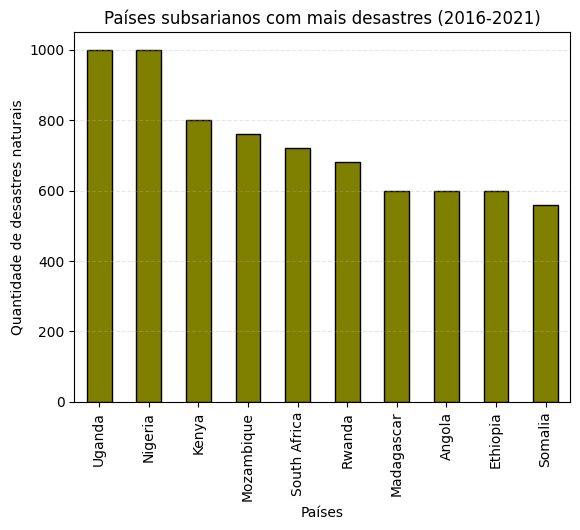

In [37]:
#Quais países da África subsariana mais sofrem com problemas ambientais?
cont_paises= df_desastres_paises.head(10)
cont_paises.plot(kind= "bar", edgecolor="black", color="#808000")
plt.xlabel("Países")
plt.ylabel("Quantidade de desastres naturais")
plt.yticks(np.arange(0, 1100, 200))
plt.title("Países subsarianos com mais desastres (2016-2021)")
plt.grid(axis= 'y', linestyle = '--', alpha = 0.3)
plt.show()

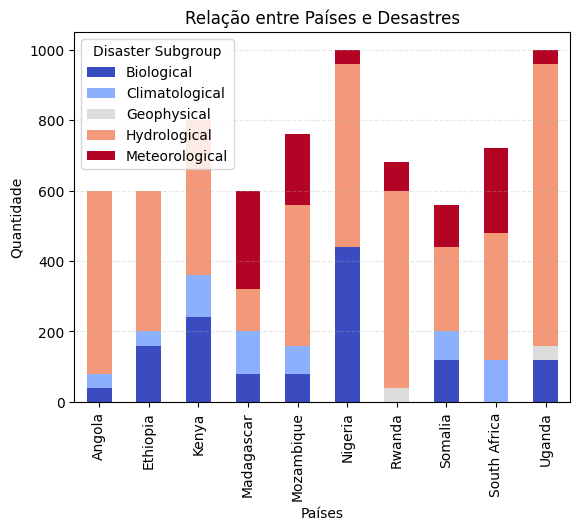

In [54]:
#-Quais os problemas mais comuns nesses países?
df_pivot = df_resultado.pivot_table(index="Country", columns="Disaster Subgroup", values="contagem")
df_pivot.plot(kind="bar", stacked=True, colormap= "coolwarm")
plt.xlabel("Países")
plt.ylabel("Quantidade")
plt.grid(axis= 'y', linestyle = '--', alpha = 0.3)
plt.title("Relação entre Países e Desastres")
plt.show()

In [55]:
#Qual a relação entre a % de terra arável com o estresse hídrico do país?
df_impactos_africa

,Unnamed: 0.1,Unnamed: 0_x,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,2016_x,2017_x,2018_x,2019_x,...,Unnamed: 0,Country Code,Indicator Name,Indicator Code,2016,2017,2018,2019,2020,2021_y
0,0,1,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,10.818819,10.806661,9.976818,10.333224,...,1,AFE,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,61.093195,60.457339,59.871612,59.127743,59.295159,59.083023
1,1,3,Africa Western and Central,AFW,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,25.653018,25.806762,24.671287,24.544867,...,3,AFW,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,40.157416,39.914643,39.476005,39.364960,38.704804,38.334278
2,2,4,Angola,AGO,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,45.267781,45.267781,45.267781,45.267781,...,4,AGO,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,66.180450,66.331110,66.597080,66.537690,66.184080,65.732710
3,3,16,Burundi,BDI,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,15.387362,15.387362,15.387362,15.387362,...,16,BDI,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,93.920820,93.906300,93.840570,93.781660,93.761570,93.650790
4,4,18,Benin,BEN,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,62.761506,61.965812,61.965812,61.965812,...,18,BEN,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,20.551530,17.742380,15.182500,14.360900,13.567590,13.075830
5,5,33,Botswana,BWA,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,47.839046,52.124352,47.647059,49.111342,...,33,BWA,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,14.456940,13.387630,12.390470,11.382070,16.868580,16.447040
6,6,34,Central African Republic,CAF,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,82.896552,82.896552,82.896552,82.896552,...,34,CAF,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,76.801450,76.027610,75.296840,74.645590,73.918800,73.546040
7,7,46,Comoros,COM,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,48.000000,48.000000,48.000000,48.000000,...,46,COM,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,34.274170,33.246870,32.503630,32.132690,31.436660,31.034440
8,8,47,Cabo Verde,CPV,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,5.925926,5.925926,5.925926,5.925926,...,47,CPV,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,9.452392,8.044661,6.571064,5.530265,5.911571,5.786589
9,9,56,Djibouti,DJI,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,84.210526,84.210526,84.210526,84.210526,...,56,DJI,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,1.097744,1.034784,0.970897,0.913054,0.941493,0.917983
